## Palm Oil Tree detection training version 7

Image Size = 640x640
Model Size = Small
Epoch = 200



In [1]:
MODEL_VERSION = '7'

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import os
HOME = os.getcwd()
HOME = '/content'
print(HOME)

from google.colab import drive
GOOGLE_DRIVE = f'{HOME}/drive'
drive.mount(GOOGLE_DRIVE)

/content
Mounted at /content/drive


In [4]:
class Experiment:
  '''
  Google drive path:

  PROJECT_DRIVE = MyDrive/ai/projects/palmtree
  EXPERIMENT_DRIVE = MyDrive/ai/projects/palmtree/experiments
  UPLOAD_DRIVE = MyDrive/ai/projects/palmtree/uploads
  DATASET_DRIVE = MyDrive/ai/projects/palmtree/datasets
  '''
  EPOCHS = 200
  IMGSZ = 640
  MODEL_NAME = "yolov8s"
  EXPERIMENT_HOME = f'{HOME}/experiments/{MODEL_VERSION}'
  DATASET_HOME = f'{HOME}/datasets/palm-tree-detection-{MODEL_VERSION}'

  PROJECT_DRIVE = f'{GOOGLE_DRIVE}/MyDrive/ai/projects/palmtree'
  EXPERIMENT_DRIVE = f'{PROJECT_DRIVE}/experiments/{MODEL_VERSION}'
  DATASET_DRIVE = f'{PROJECT_DRIVE}/datasets/palm-tree-detection-{MODEL_VERSION}'
  WEIGHTS_DRIVE = f'{PROJECT_DRIVE}/weights/{MODEL_VERSION}'


print(Experiment.EXPERIMENT_HOME)


/content/experiments/7


In [5]:

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.5/225.8 GB disk)


In [6]:
%cd {HOME}
%mkdir -p {Experiment.EXPERIMENT_HOME}
%mkdir -p {Experiment.DATASET_HOME}
%mkdir -p {Experiment.EXPERIMENT_DRIVE}
%mkdir -p {Experiment.WEIGHTS_DRIVE}

!cp -fpR {Experiment.DATASET_DRIVE} /content/datasets/
!ls /content

/content
datasets  drive  experiments


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
#model = YOLO(f'{HOME}/yolov8s.pt')
#results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
#results[0].boxes.xyxy

In [ ]:
#results[0].boxes.conf

In [ ]:
#results[0].boxes.cls

## Custom Training

In [ ]:
class Dataset:
  def __init__(self, location):
    self.location = location


dataset = Dataset(location=Experiment.DATASET_HOME)
!rm -fR {Experiment.EXPERIMENT_HOME}/runs
!mkdir -p {Experiment.EXPERIMENT_HOME}/runs



In [ ]:

%cd {Experiment.EXPERIMENT_HOME}
!yolo task=detect mode=train model={Experiment.MODEL_NAME}.pt data={dataset.location}/data.yaml epochs={Experiment.EPOCHS} imgsz={Experiment.IMGSZ} plots=True

/content/experiments/7
New https://pypi.org/project/ultralytics/8.0.182 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/palm-tree-detection-7/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visu

In [ ]:
TRAIN_NUMBER = ''
!ls {Experiment.EXPERIMENT_HOME}/runs/detect/train{TRAIN_NUMBER}/

args.yaml					     R_curve.png
confusion_matrix_normalized.png			     results.csv
confusion_matrix.png				     results.png
events.out.tfevents.1695160173.b8f4a62e9348.13909.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
labels_correlogram.jpg				     train_batch2.jpg
labels.jpg					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


/content/experiments/7


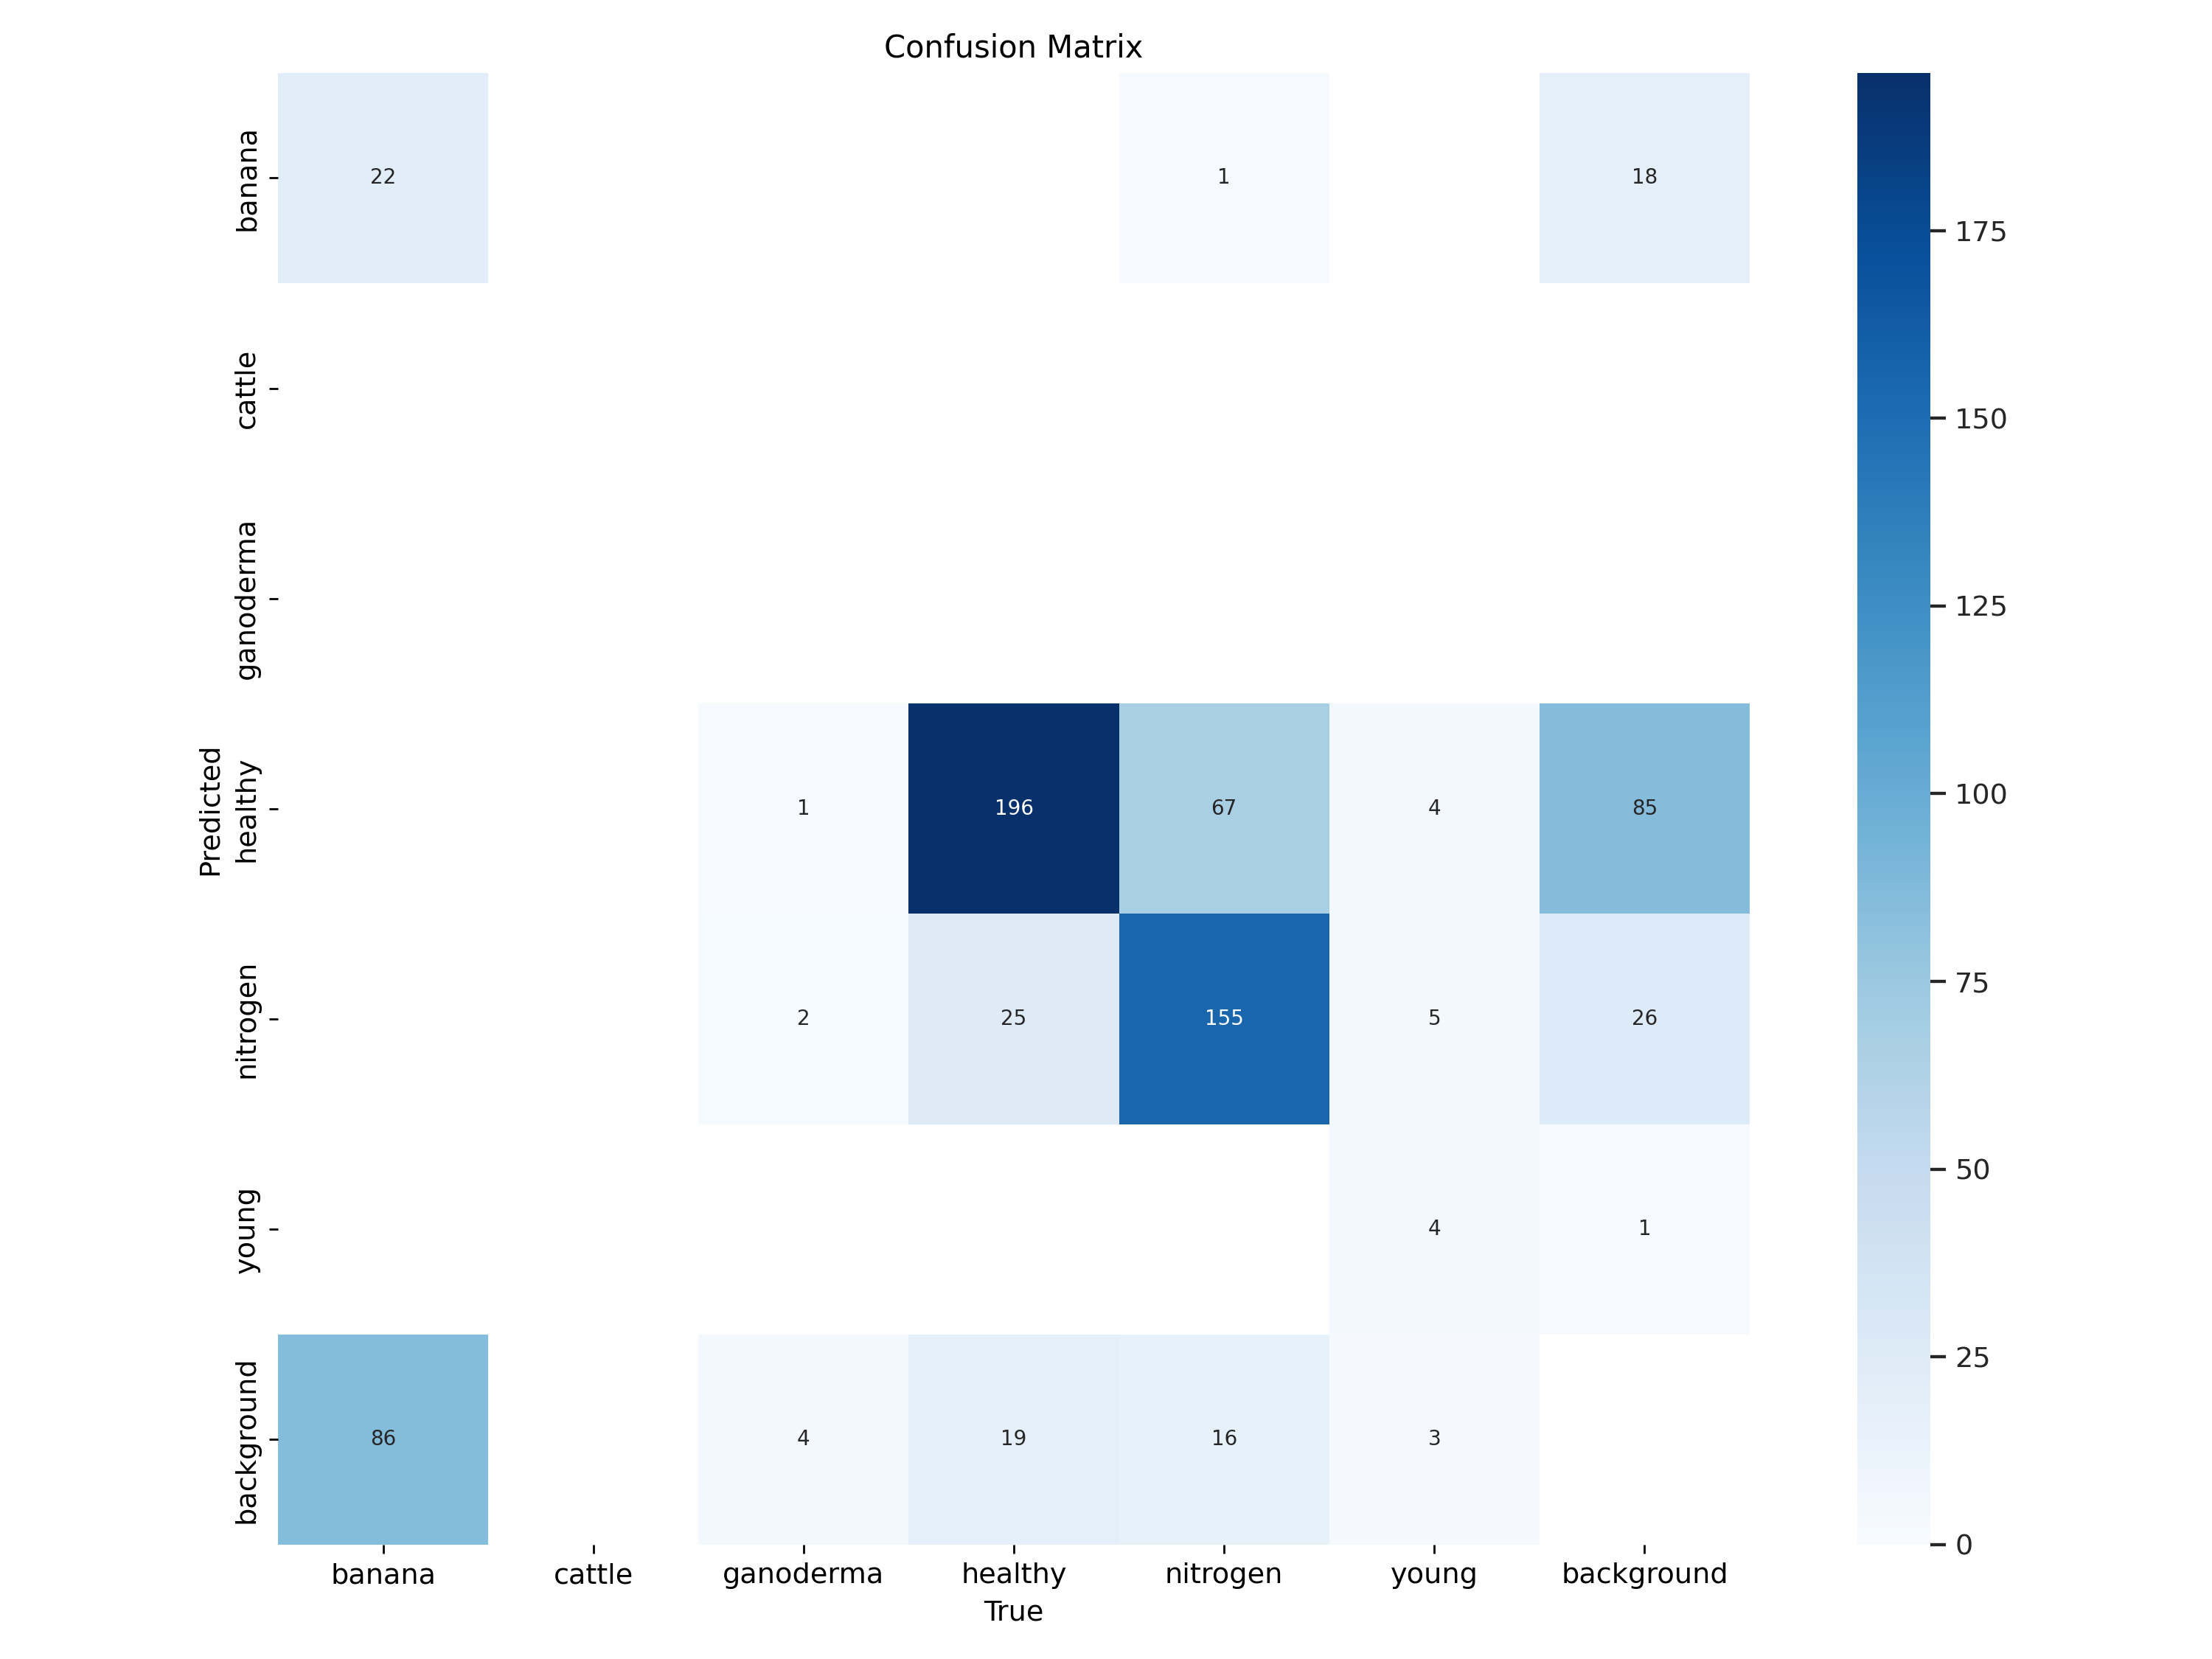

In [ ]:
%cd {Experiment.EXPERIMENT_HOME}
Image(filename=f'{Experiment.EXPERIMENT_HOME}/runs/detect/train{TRAIN_NUMBER}/confusion_matrix.png', width=600)

/content/experiments/7


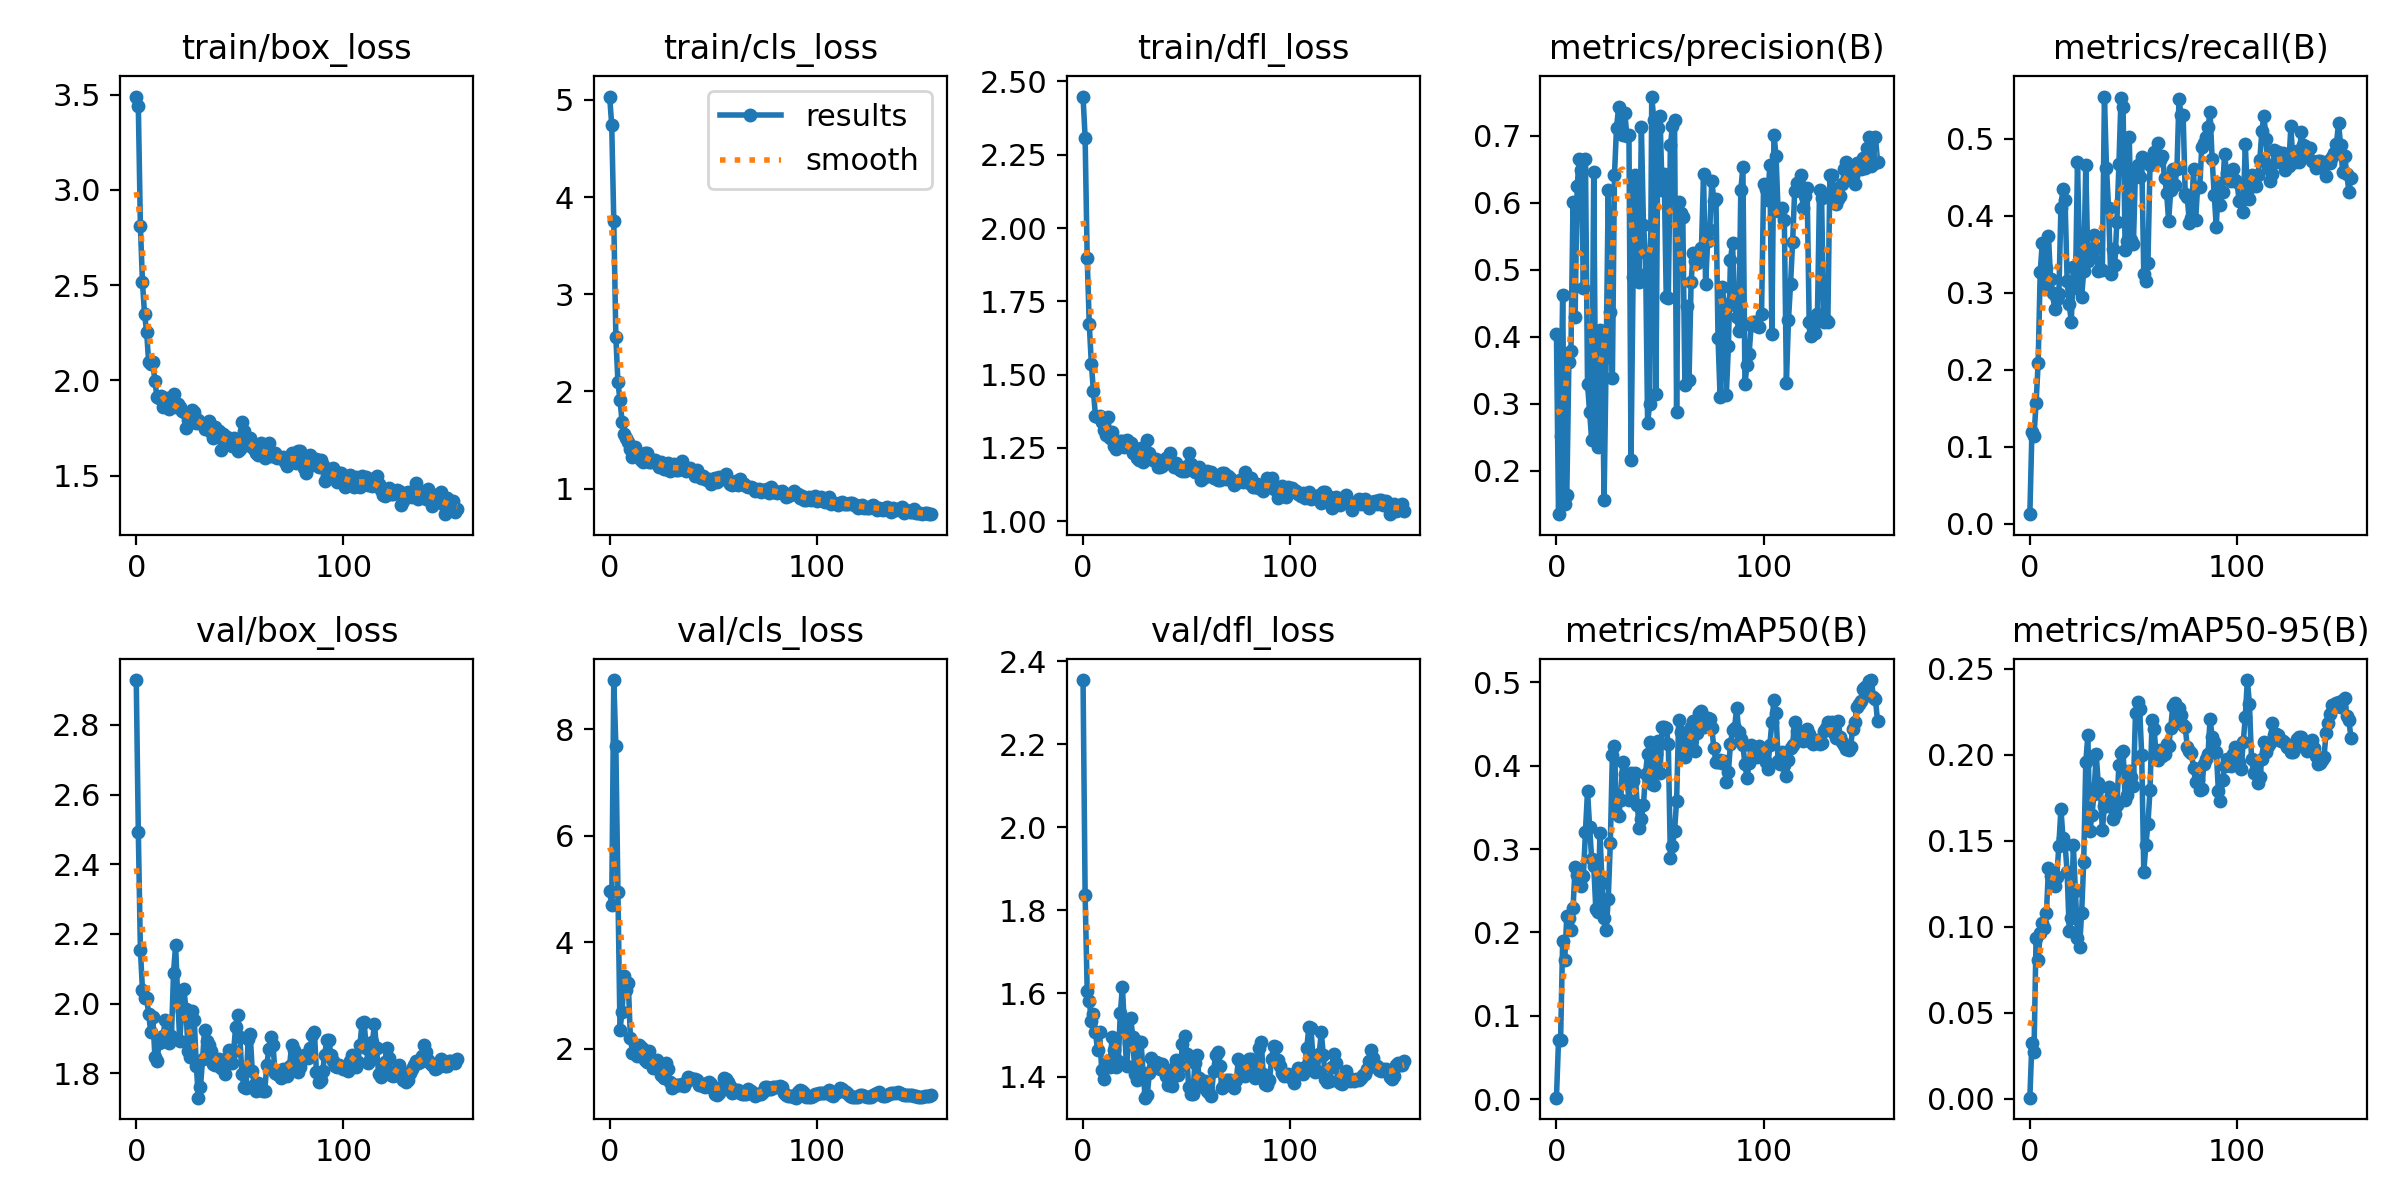

In [ ]:
%cd {Experiment.EXPERIMENT_HOME}
Image(filename=f'{Experiment.EXPERIMENT_HOME}/runs/detect/train{TRAIN_NUMBER}/results.png', width=600)

/content/experiments/7


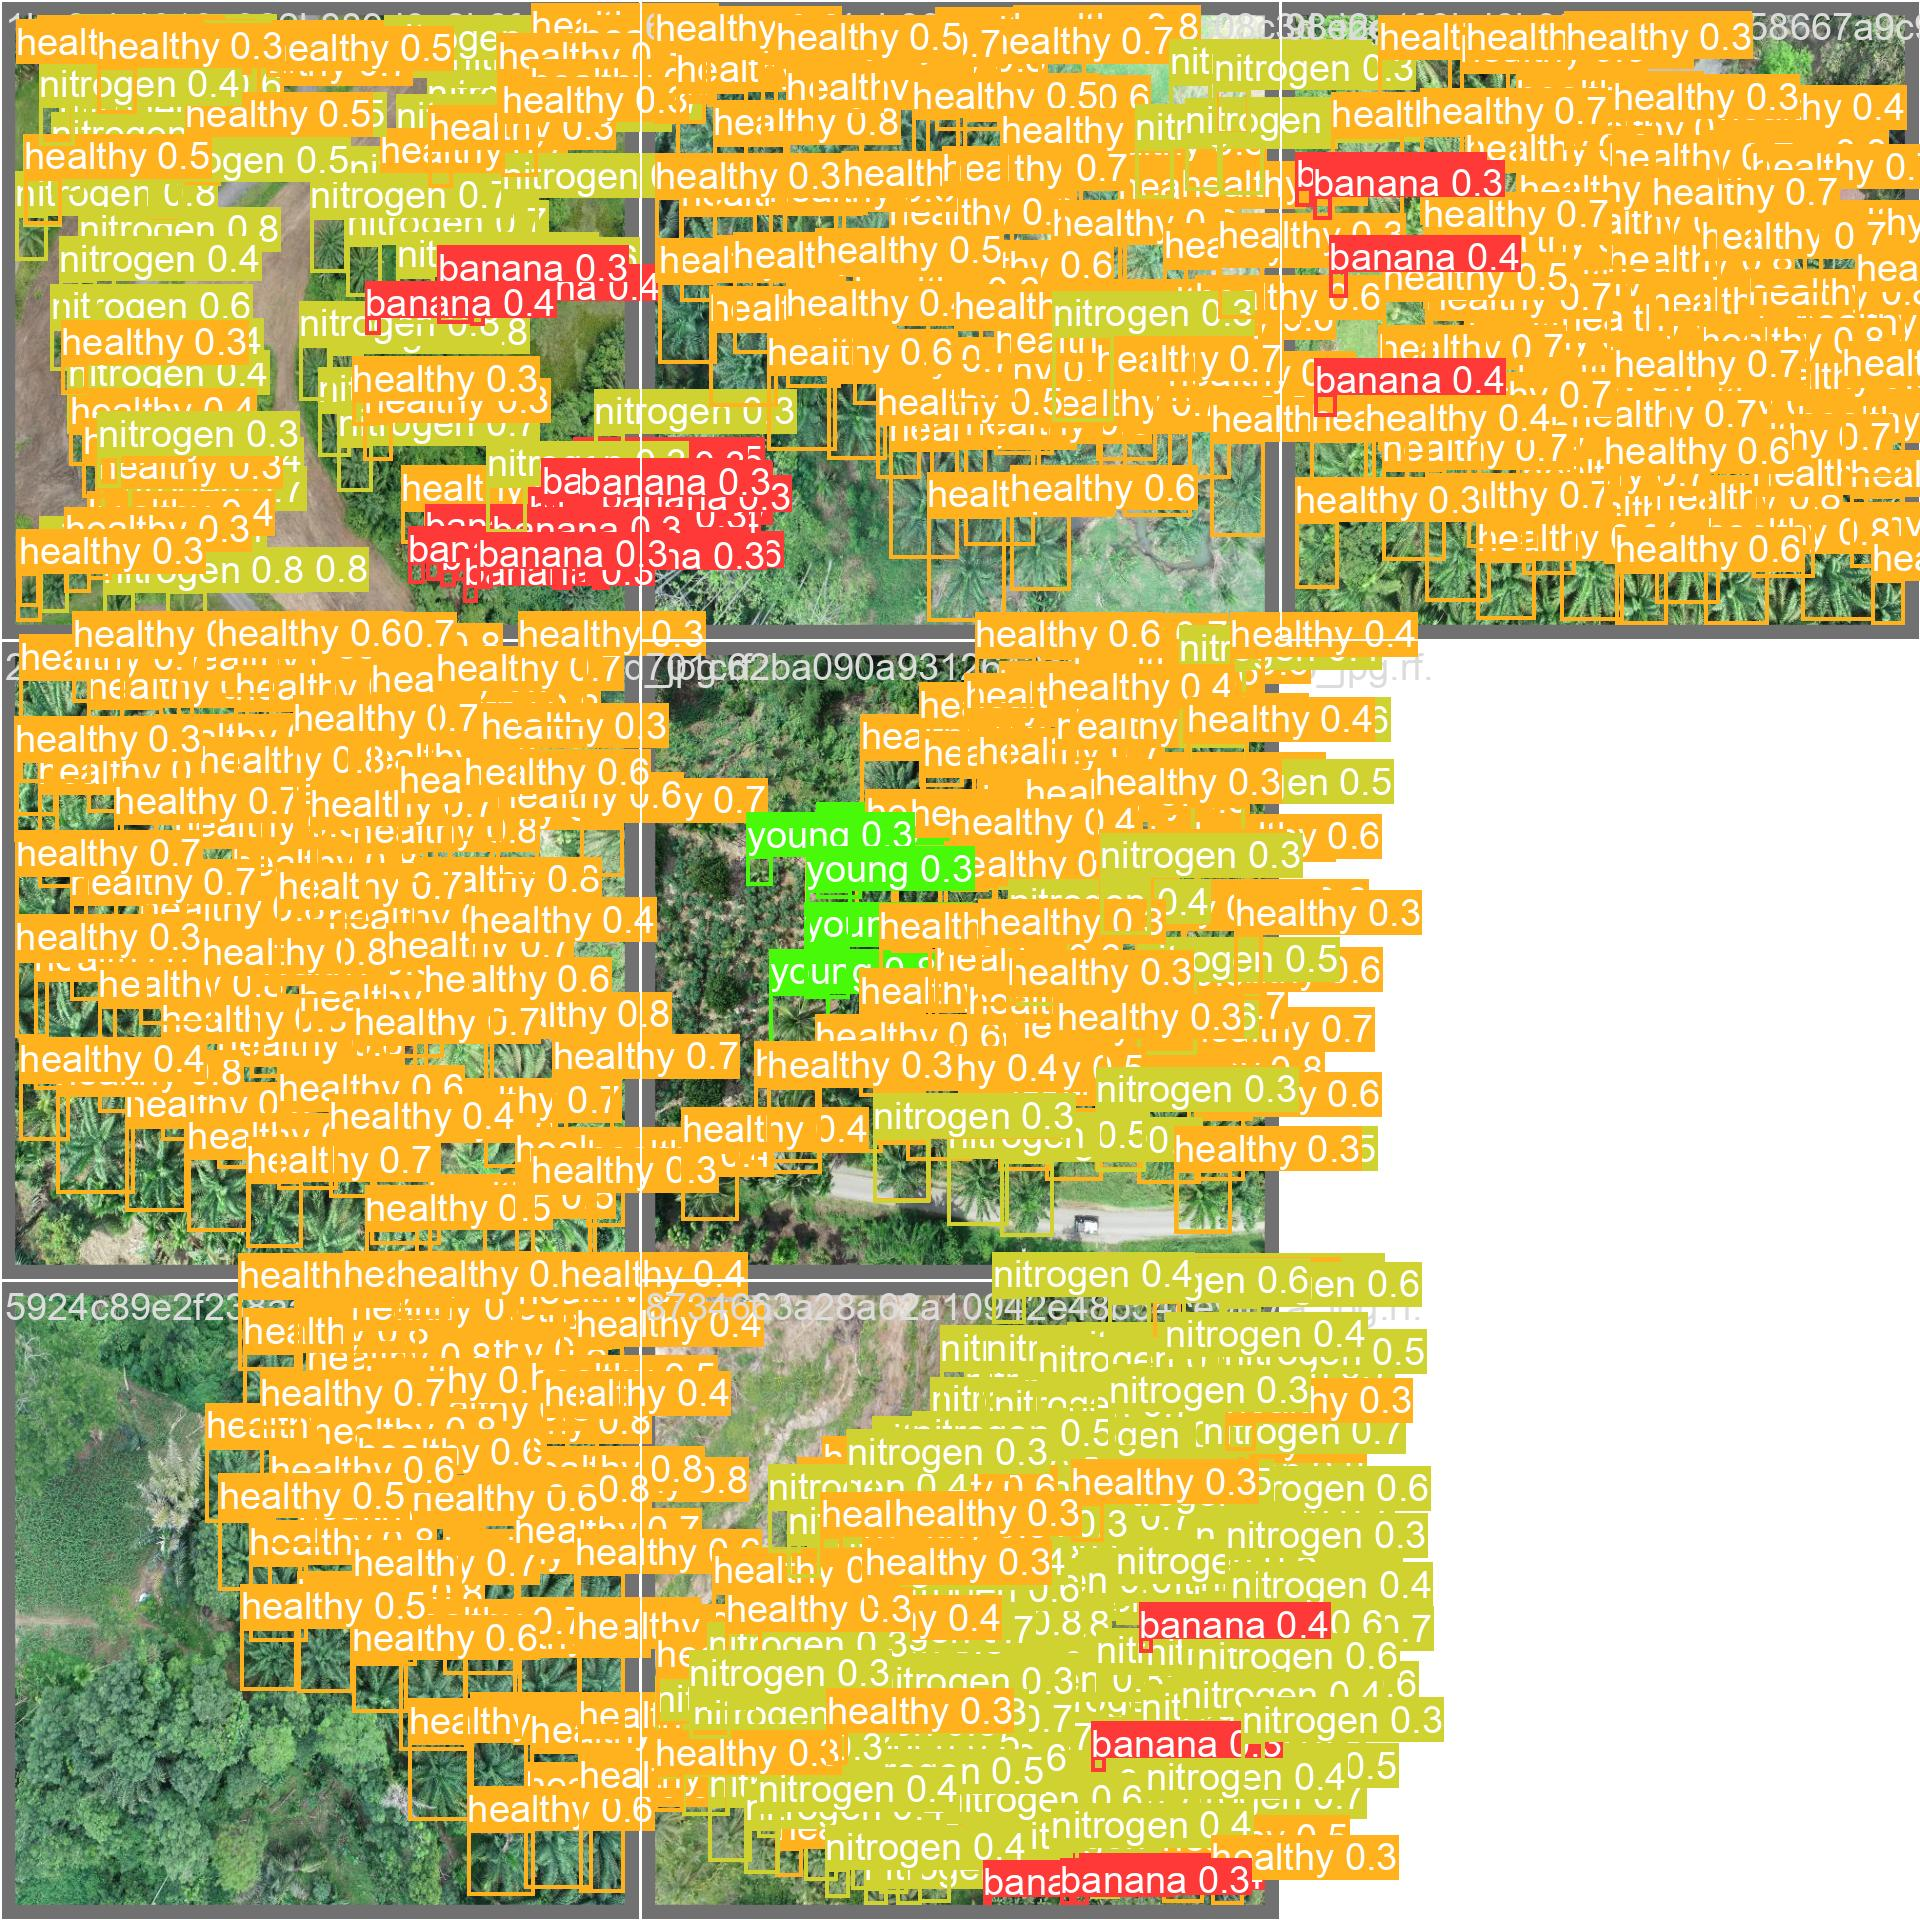

In [ ]:
%cd {Experiment.EXPERIMENT_HOME}
Image(filename=f'{Experiment.EXPERIMENT_HOME}/runs/detect/train{TRAIN_NUMBER}/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {Experiment.EXPERIMENT_HOME}

!yolo task=detect mode=val model={Experiment.EXPERIMENT_HOME}/runs/detect/train{TRAIN_NUMBER}/weights/best.pt data={dataset.location}/data.yaml

/content/experiments/7
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients
val: Scanning /content/datasets/palm-tree-detection-7/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  3.13it/s]
                   all          7        610      0.703      0.432      0.481      0.241
                banana          7        108      0.447       0.27      0.269     0.0924
             ganoderma          7          7          1          0       0.26      0.156
               healthy          7        240      0.548      0.858      0.684      0.332
              nitrogen          7        239      0.744      0.718       0.79       0.42
                 young          7         16      0.774      0.312      0.403      0.204
Speed: 0.4ms 

## Inference with Custom Model

In [ ]:
%cd {Experiment.EXPERIMENT_HOME}
!yolo task=detect mode=predict model={Experiment.EXPERIMENT_HOME}/runs/detect/train{TRAIN_NUMBER}/weights/best.pt conf=0.30 source={dataset.location}/test/images save=True



/content/experiments/7
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients

image 1/3 /content/datasets/palm-tree-detection-7/test/images/0dbeba5db37bd6c71cc902771055b748_jpg.rf.d7e7b1f5cbc3151ee75d05cd49056827.jpg: 640x640 31 healthys, 5.3ms
image 2/3 /content/datasets/palm-tree-detection-7/test/images/468afb69d13f5b9723bcb00fe894ea89_jpg.rf.420fef89afe6958e8ec44f295ce5415f.jpg: 640x640 51 healthys, 7 nitrogens, 5.9ms
image 3/3 /content/datasets/palm-tree-detection-7/test/images/7d04ccaae324438c50976bba87965523_jpg.rf.166ba94122cb5f5fcd57a7bcb1a727da.jpg: 640x640 61 healthys, 27 nitrogens, 5.6ms
Speed: 2.3ms preprocess, 5.6ms inference, 29.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



Inspect results.

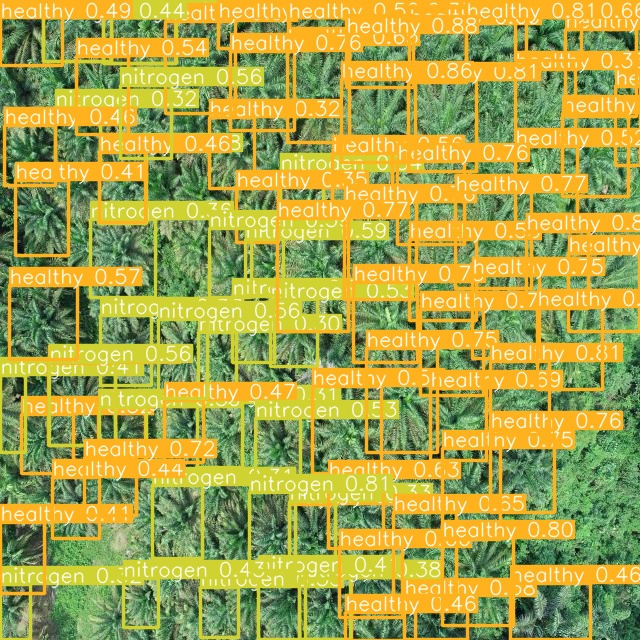

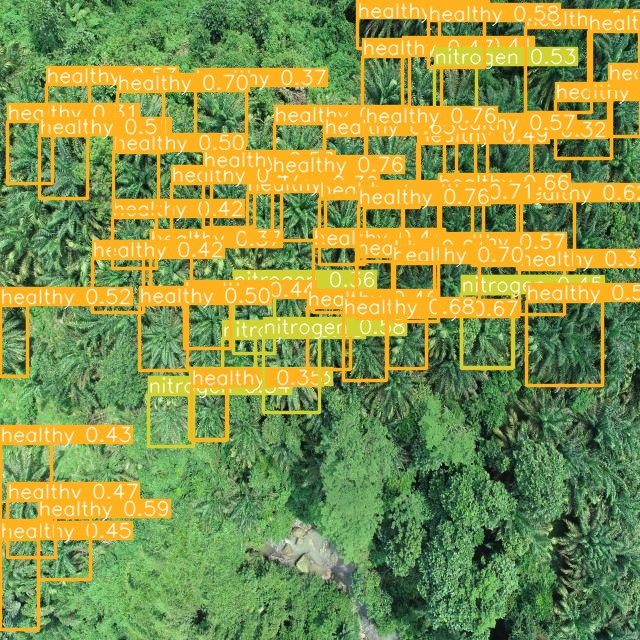

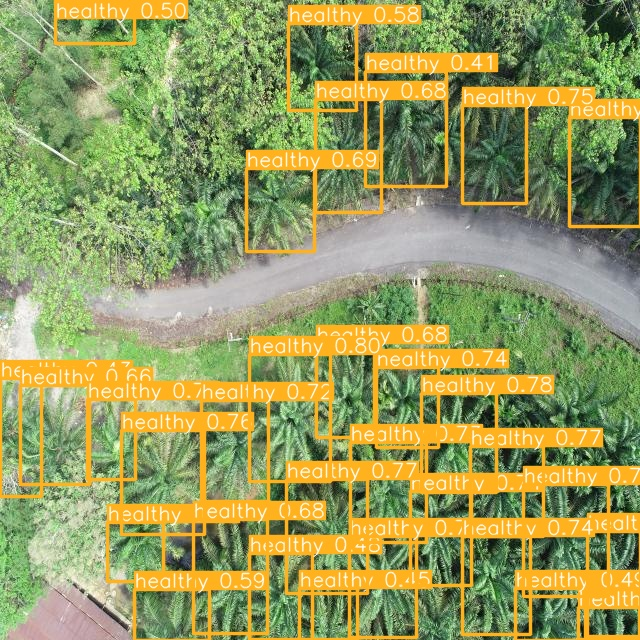

In [ ]:
PREDICT_NUMBER = ''
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{Experiment.EXPERIMENT_HOME}/runs/detect/predict{PREDICT_NUMBER}/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Saving the model weight to Google Drive

Store the best weight to Google Drive
/content/drive/MyDrive/ai/projects/palmtree/experiments/

In [ ]:
!ls -altr {Experiment.EXPERIMENT_HOME}/runs/detect/train/weights
!rm -fR {Experiment.EXPERIMENT_DRIVE}
!mkdir -p {Experiment.EXPERIMENT_DRIVE}
!cp -fpR {Experiment.EXPERIMENT_HOME}/runs {Experiment.EXPERIMENT_DRIVE}
!cp {Experiment.EXPERIMENT_HOME}/runs/detect/train/weights/best.pt {Experiment.WEIGHTS_DRIVE}

total 43984
drwxr-xr-x 2 root root     4096 Sep 19 21:50 .
-rw-r--r-- 1 root root 22514222 Sep 19 21:54 last.pt
-rw-r--r-- 1 root root 22514222 Sep 19 21:54 best.pt
drwxr-xr-x 3 root root     4096 Sep 19 21:54 ..
